## problem1

In [1]:
from csv import reader
import numpy as np

In [2]:
with open('prostate-train.csv','r') as f:
    data = [datum for datum in reader(f, delimiter = ",")]

data_array = np.asarray(data)
headers = data_array[0] # first row is headers
training_data = np.asarray(data_array[1:], dtype=np.float64)

In [3]:
with open('prostate-test.csv','r') as f:
    data = [datum for datum in reader(f, delimiter = ",")]

test_data = np.asarray(np.asarray(data)[1:], dtype=np.float64)

In [4]:
print(headers)

['lcavol' 'lweight' 'age' 'lbph' 'svi' 'lcp' 'gleason' 'pgg45' 'lpsa']


In [5]:
print(training_data[:10])

[[-0.5798185   2.769459   50.         -1.38629436  0.         -1.38629436
   6.          0.         -0.4307829 ]
 [-0.99425227  3.319626   58.         -1.38629436  0.         -1.38629436
   6.          0.         -0.1625189 ]
 [-0.51082562  2.691243   74.         -1.38629436  0.         -1.38629436
   7.         20.         -0.1625189 ]
 [-1.2039728   3.282789   58.         -1.38629436  0.         -1.38629436
   6.          0.         -0.1625189 ]
 [ 0.75141609  3.432373   62.         -1.38629436  0.         -1.38629436
   6.          0.          0.3715636 ]
 [-1.04982212  3.228826   50.         -1.38629436  0.         -1.38629436
   6.          0.          0.7654678 ]
 [ 0.69314718  3.539509   58.          1.53686722  0.         -1.38629436
   6.          0.          0.8544153 ]
 [ 0.25464222  3.604138   65.         -1.38629436  0.         -1.38629436
   6.          0.          1.2669476 ]
 [-1.34707365  3.598681   63.          1.2669476   0.         -1.38629436
   6.          0.     

### import packages

In [6]:
# import necessary packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

In [7]:
# use pandas to modify the training data
df = pd.DataFrame(training_data)
df.columns = headers

X_train = df.iloc[:,:8]
y_train = df.iloc[:,8]

In [8]:
X_test = test_data[:,:8]
y_test = test_data[:,8]

### problem 1.4

In [9]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'coefficient: {np.round(lr.coef_, 3)}')
print(f'intercept: {np.round(lr.intercept_, 3)}')

coefficient: [ 0.577  0.614 -0.019  0.145  0.737 -0.206 -0.03   0.009]
intercept: 0.429


### problem 1.6

In [10]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(f'train mse: {round(mean_squared_error(y_train, y_train_pred),3)}')
print(f'test mse: {round(mean_squared_error(y_test, y_test_pred),3)}')

train mse: 0.439
test mse: 0.521


### problem 1.1 & 1.6

In [11]:
# linear regression
lr = LinearRegression()
coefs = []
intercepts = []
train_mse = []
test_mse = []
for i in range(8):
    lr.fit(np.array(df.iloc[:,i]).reshape(-1, 1), y_train)
    y_train_pred = lr.predict(np.array(df.iloc[:,i]).reshape(-1, 1))
    y_test_pred = lr.predict(X_test[:,i].reshape(-1, 1))
    coefs.append(np.round(lr.coef_, 3)[0])
    intercepts.append(np.round(lr.intercept_, 3))
    train_mse.append(round(mean_squared_error(y_train, y_train_pred),3))
    test_mse.append(round(mean_squared_error(y_test, y_test_pred),3))
    
print(f'slope: {coefs}')
print(f'intercept: {intercepts}')
print(f'train mse: {train_mse}')
print(f'test mse: {test_mse}')

slope: [0.713, 1.23, 0.037, 0.217, 1.602, 0.422, 0.583, 0.018]
intercept: [1.516, -2.006, 0.079, 2.437, 2.094, 2.543, -1.475, 1.967]
train mse: [0.665, 1.099, 1.363, 1.338, 0.991, 1.093, 1.269, 1.149]
test mse: [0.48, 1.013, 1.128, 1.177, 0.688, 0.545, 0.851, 0.954]


### problem 1.2

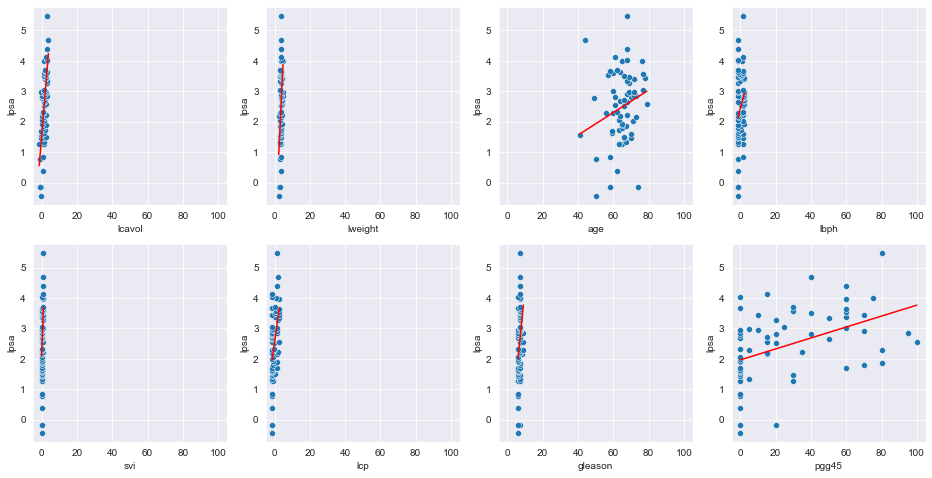

In [12]:
fig,ax = plt.subplots(2,4,figsize=(16,8))
for i in range(8):
    x_predict = [df.iloc[:,i].min(),df.iloc[:,i].max()]
    y_hat = np.array(x_predict) * coefs[i] + intercepts[i]
    
    plt_i = i//4
    plt_j = i%4
    ax[plt_i][plt_j] = sns.scatterplot(x=df.iloc[:,i],y=df.lpsa, ax=ax[plt_i][plt_j]);
    ax[plt_i][plt_j].plot(x_predict,y_hat, color = 'red');
    ax[plt_i][plt_j].set_xlim([-5,105])

### problem 1.3

In [13]:
# normalize training data
scaler = StandardScaler()
scaler.fit(X_train)
df.iloc[:,:8] = scaler.transform(X_train)
X_train = df.iloc[:,:8]

In [14]:
# linear regression
lr = LinearRegression()
coefs = []
intercepts = []
for i in range(8):
    lr.fit(np.array(df.iloc[:,i]).reshape(-1, 1), y_train)
    coefs.append(np.round(lr.coef_, 3)[0])
    intercepts.append(np.round(lr.intercept_, 3))
print(f'coefficient: {coefs}')
print(f'intercept: {intercepts}')

coefficient: [0.879, 0.582, 0.273, 0.315, 0.668, 0.586, 0.41, 0.537]
intercept: [2.452, 2.452, 2.452, 2.452, 2.452, 2.452, 2.452, 2.452]


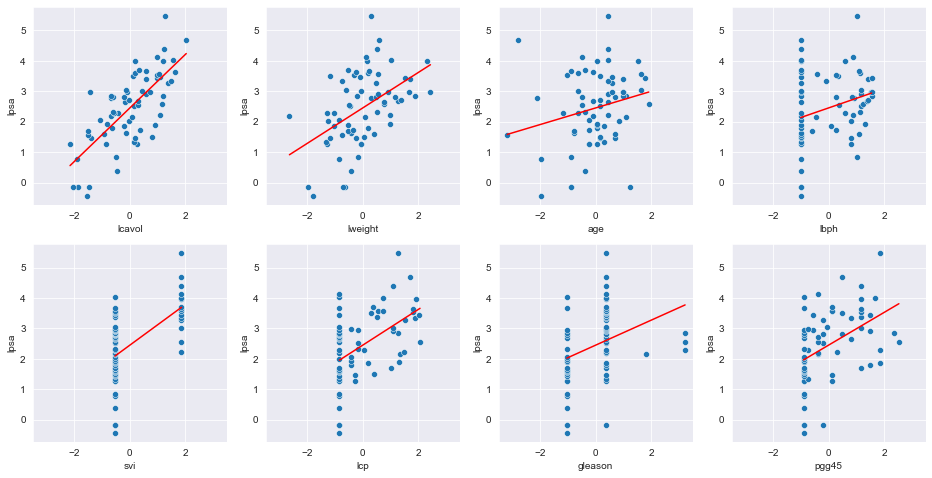

In [15]:
fig,ax = plt.subplots(2,4,figsize=(16,8))
for i in range(8):
    x_predict = [df.iloc[:,i].min(),df.iloc[:,i].max()]
    y_hat = np.array(x_predict) * coefs[i] + intercepts[i]
    
    plt_i = i//4
    plt_j = i%4
    ax[plt_i][plt_j] = sns.scatterplot(x=df.iloc[:,i],y=df.lpsa, ax=ax[plt_i][plt_j]);
    ax[plt_i][plt_j].plot(x_predict,y_hat, color = 'red');
    ax[plt_i][plt_j].set_xlim([-3.5,3.5])

### problem 1.4

In [16]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'coefficient: {np.round(lr.coef_, 3)}')
print(f'intercept: {np.round(lr.intercept_, 3)}')

coefficient: [ 0.711  0.29  -0.141  0.21   0.307 -0.287 -0.021  0.275]
intercept: 2.452


### problem 1.6

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(f'train mse: {round(mean_squared_error(y_train, y_train_pred),3)}')
print(f'test mse: {round(mean_squared_error(y_test, y_test_pred),3)}')

train mse: 0.439
test mse: 44.544


In [18]:
y_test

array([0.7654678, 1.047319 , 1.047319 , 1.3987169, 1.6582281, 1.7316555,
       1.7664417, 1.8164521, 2.008214 , 2.0215476, 2.0856721, 2.3075726,
       2.3749058, 2.5687881, 2.5915164, 2.5915164, 2.6844403, 2.6912431,
       2.7047113, 2.7880929, 2.8535925, 2.8820035, 2.8820035, 2.8875901,
       3.0563569, 3.0750055, 3.5130369, 3.5709402, 5.1431245, 5.5829322])

In [19]:
y_test_pred

array([-4.66690213, -3.73999153, -5.37856576, -2.69198242,  1.72822411,
       -5.36111924, -4.89581756, -0.04888502, -4.87751849, -4.25010259,
       -2.39002081, -2.36001105, -2.80453772,  6.18025336, -1.39269605,
       -5.15340063, 14.24116887,  6.36317372, -1.29453832, -2.15176386,
        7.00536451, 12.19438006, -4.09467762,  1.73507964, -0.02330649,
       20.85989464,  9.84557253, 15.08964365,  0.06527586,  1.38138473])

In [20]:
y_train_pred

array([0.75353858, 0.70040498, 0.44906559, 0.55687338, 1.700083  ,
       0.76462172, 2.23169054, 1.46213549, 0.95764547, 2.01839575,
       1.77468627, 1.85140133, 1.39943465, 2.28081126, 1.24066142,
       1.90227158, 1.97740214, 1.06025544, 2.56035833, 2.19369936,
       2.25005272, 1.94428706, 2.14202486, 1.97291915, 0.98846838,
       1.58796666, 0.95575097, 3.86245665, 1.68493079, 2.15305679,
       2.12067165, 2.45045739, 2.62328973, 4.09638   , 2.57075566,
       3.17981669, 3.06252822, 2.39221612, 2.30957586, 2.89233974,
       2.52992457, 2.93714431, 3.12648065, 3.12713435, 1.4759386 ,
       3.02721263, 3.19521036, 2.25589475, 3.33590171, 3.44930283,
       3.50837247, 3.59520175, 3.30376434, 2.11377357, 2.87284884,
       3.48312979, 2.62355283, 3.6956864 , 3.13189774, 2.87004781,
       4.09922459, 3.36357643, 3.43564731, 4.14249256, 3.77414281,
       4.44984337, 4.30839196])

In [21]:
np.array(y_train)

array([-0.4307829, -0.1625189, -0.1625189, -0.1625189,  0.3715636,
        0.7654678,  0.8544153,  1.2669476,  1.2669476,  1.2669476,
        1.3480731,  1.446919 ,  1.4701758,  1.4929041,  1.5581446,
        1.5993876,  1.6389967,  1.6956156,  1.7137979,  1.8000583,
        1.8484548,  1.8946169,  1.9242487,  2.008214 ,  2.0476928,
        2.1575593,  2.1916535,  2.2137539,  2.2772673,  2.2975726,
        2.3272777,  2.5217206,  2.5533438,  2.5687881,  2.6567569,
        2.677591 ,  2.7180005,  2.7942279,  2.8063861,  2.8124102,
        2.8419982,  2.8535925,  2.9204698,  2.9626924,  2.9626924,
        2.9729753,  3.0130809,  3.0373539,  3.2752562,  3.3375474,
        3.3928291,  3.4355988,  3.4578927,  3.5160131,  3.5307626,
        3.5652984,  3.5876769,  3.6309855,  3.6800909,  3.7123518,
        3.9843437,  3.993603 ,  4.029806 ,  4.1295508,  4.3851468,
        4.6844434,  5.477509 ])